In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
# import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [25]:
pip install pillow

     |████████████████████████████████| 3.3 MB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/yao/Desktop/detection/training_set/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/Users/yao/Desktop/detection/test_set/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')
                                         

Found 5616 images belonging to 2 classes.
Found 1403 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'others': 0, 'screenshots': 1}

In [4]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:

#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,steps_per_epoch = 250,epochs = 10,validation_data = test_dataset)

Epoch 1/10
 10/250 [>.............................] - ETA: 2:57 - loss: 0.6629 - accuracy: 0.5656

/Users/yao/miniconda3/lib/python3.8/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


250/250 [==============================] - 166s 658ms/step - loss: 0.2359 - accuracy: 0.9040 - val_loss: 0.1081 - val_accuracy: 0.9572


In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Screenshot",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Not a Screenshot",fontsize=30)

1/1 [==============================] - 0s 34ms/step
[[1.]]


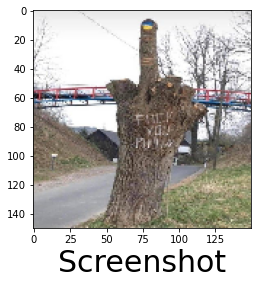

In [18]:
predictImage("/Users/yao/Desktop/detection/test_set/others/1317.jpg")